# IMPORTING DATASET

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import zipfile
import os

In [ ]:
daisy=zipfile.ZipFile('/content/drive/MyDrive/daisy.zip')
daisy.extractall('/content/data')
daisy.close()

In [ ]:
tulip=zipfile.ZipFile('/content/drive/MyDrive/tulips.zip')
tulip.extractall('/content/data')
tulip.close()

In [ ]:
sunflower=zipfile.ZipFile('/content/drive/MyDrive/sunflowers.zip')
sunflower.extractall('/content/data')
sunflower.close()

In [ ]:
rose=zipfile.ZipFile('/content/drive/MyDrive/roses.zip')
rose.extractall('/content/data')
rose.close()

In [ ]:
dandelion=zipfile.ZipFile('/content/drive/MyDrive/dandelion.zip')
dandelion.extractall('/content/data')
dandelion.close()

# Reading the files and plotting the same

In [ ]:
import os
path_to_directory = '/content/data/daisy'

# List the files in the directory
file_list = os.listdir(path_to_directory)

# Print the file list
print(file_list)


['4613992315_143ccc2a10_m.jpg', '14021430525_e06baf93a9.jpg', '2838487505_6c3b48efa5_m.jpg', '4683997791_56e7d3c03c_n.jpg', '433037739_6a030e5912.jpg', '4610018126_21f438d2dc_m.jpg', '4654579740_6671a53627_m.jpg', '4258408909_b7cc92741c_m.jpg', '5434742166_35773eba57_m.jpg', '5973488341_50bdf6cee3_n.jpg', '10559679065_50d2b16f6d.jpg', '2349640101_212c275aa7.jpg', '4229503616_9b8a42123c_n.jpg', '2642408410_61545fdc83_n.jpg', '5794839_200acd910c_n.jpg', '7288989324_c25d9febbf.jpg', '8446495985_f72d851482.jpg', '9054268881_19792c5203_n.jpg', '3445110406_0c1616d2e3_n.jpg', '3764116502_f394428ee0_n.jpg', '8709535323_a6bea3e43f.jpg', '17027891179_3edc08f4f6.jpg', '367020749_3c9a652d75.jpg', '2567033807_8e918c53d8_n.jpg', '2001380507_19488ff96a_n.jpg', '2579018590_74359dcf1a_m.jpg', '15813862117_dedcd1c56f_m.jpg', '172967318_c596d082cc.jpg', '14114116486_0bb6649bc1_m.jpg', '9529916092_de70623523_n.jpg', '1374193928_a52320eafa.jpg', '5435521200_92029bbe2b_n.jpg', '4897587985_f9293ea1ed.jpg', '

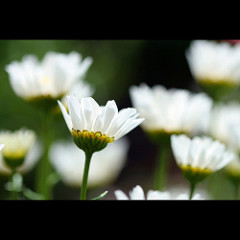

(240, 240)


In [ ]:
from PIL import Image
import IPython.display as display
image = file_list[0]

image_path = os.path.join(path_to_directory, image)

image = Image.open(image_path)
display.display(image)
print(image.size)

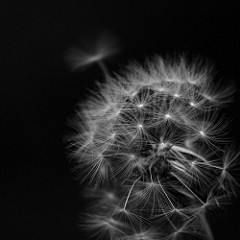

(240, 240)


In [ ]:
path_to_directory = '/content/data/dandelion'

# List the files in the directory
file_list = os.listdir(path_to_directory)

image = file_list[0]

image_path = os.path.join(path_to_directory, image)

image = Image.open(image_path)
display.display(image)
print(image.size)

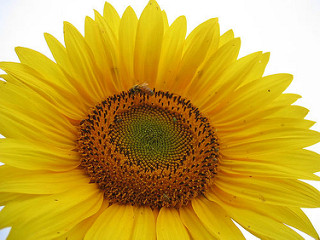

(320, 240)


In [ ]:
path_to_directory = '/content/data/sunflowers'

# List the files in the directory
file_list = os.listdir(path_to_directory)
image = file_list[0]

image_path = os.path.join(path_to_directory, image)

image = Image.open(image_path)
display.display(image)
print(image.size)

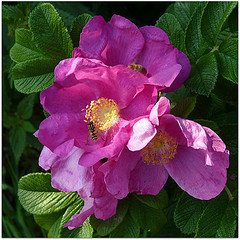

(240, 240)


In [ ]:
path_to_directory = '/content/data/roses'

# List the files in the directory
file_list = os.listdir(path_to_directory)
image = file_list[0]

image_path = os.path.join(path_to_directory, image)

image = Image.open(image_path)
display.display(image)
print(image.size)

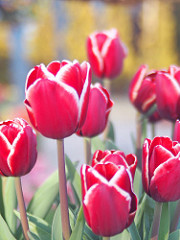

(180, 240)


In [ ]:
path_to_directory = '/content/data/tulips'

# List the files in the directory
file_list = os.listdir(path_to_directory)
image = file_list[0]

image_path = os.path.join(path_to_directory, image)

image = Image.open(image_path)
display.display(image)
print(image.size)

# Preparing the CNN model to predict the flower type

In [ ]:
import tensorflow as tf
from tensorflow import keras
from keras.layers import Dense,Conv2D,Flatten,MaxPooling2D
from keras import Sequential

In [ ]:
train_ds=tf.keras.preprocessing.image_dataset_from_directory(
    '/content/data',
    labels='inferred',
    label_mode='categorical',
    class_names=None,
    color_mode='rgb',
    batch_size=32,
    image_size=(256, 256),
    shuffle=True,
    seed=42,
    validation_split=0.2,
    subset='training'
)

Found 3690 files belonging to 5 classes.
Using 2952 files for training.


In [ ]:
valid_ds=tf.keras.preprocessing.image_dataset_from_directory(
    '/content/data',
    labels='inferred',
    label_mode='categorical',
    class_names=None,
    color_mode='rgb',
    batch_size=32,
    image_size=(256, 256),
    shuffle=True,
    seed=42,
    validation_split=0.2,
    subset='validation'
)

Found 3690 files belonging to 5 classes.
Using 738 files for validation.


In [ ]:
# checking class name
classes=train_ds.class_names

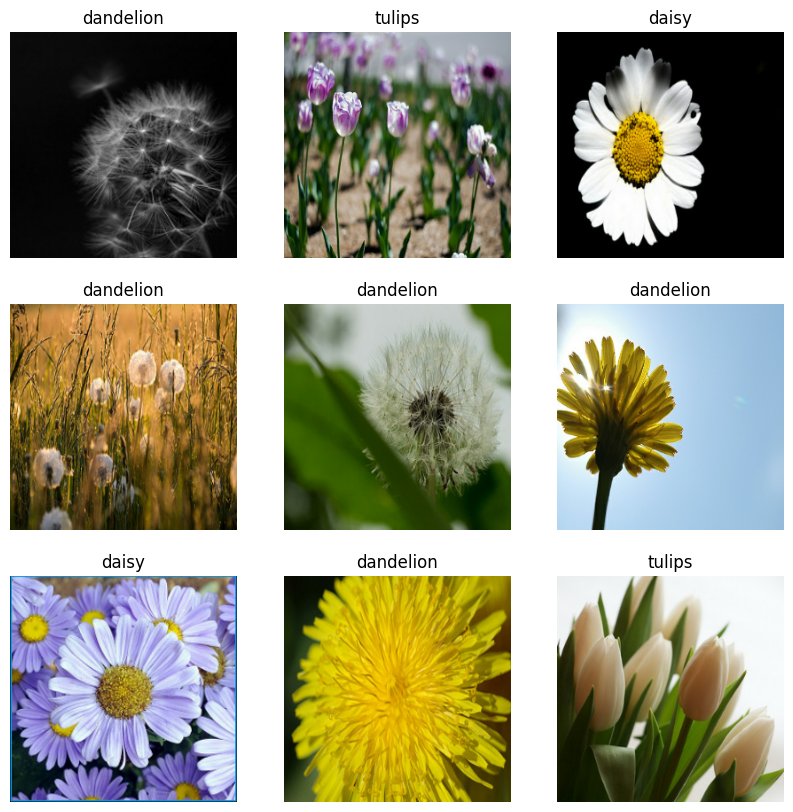

In [ ]:
# visualizing
import numpy as np
import matplotlib.pyplot as plt
plt.figure(figsize=(10,10))
for images,labels in train_ds.take(1):
  class_indices = np.argmax(labels, axis=1)
  for i in range(9):
        ax = plt.subplot(3, 3, i+1)
        plt.imshow(images[i].numpy().astype('uint8'))
        plt.title(classes[class_indices[i]])
        plt.axis('off')  # Hide axes for cleaner display

plt.show()


In [ ]:
# checking the batch
for image_batch, label_batch in train_ds.take(1):
  print(image_batch.shape)
  print(label_batch.shape)

(32, 256, 256, 3)
(32, 5)


In [ ]:
for image_batch, label_batch in valid_ds.take(1):
  print(image_batch.shape)
  print(label_batch.shape)

(32, 256, 256, 3)
(32, 5)


In [ ]:
#standardization of data
from tensorflow.keras import layers
standard_layer=layers.experimental.preprocessing.Rescaling(1./255)
norm_ds=train_ds.map(lambda x, y:(standard_layer(x),y))

In [ ]:
for image_batch, label_batch in norm_ds.take(1):
  print(image_batch[0])


tf.Tensor(
[[[0.18676472 0.3181373  0.08676471]
  [0.2269608  0.34313726 0.14803922]
  [0.24901962 0.36029413 0.19950981]
  ...
  [0.09656864 0.0632353  0.08578432]
  [0.04754902 0.06568628 0.07843138]
  [0.01617647 0.07990196 0.06127451]]

 [[0.2333343  0.3452723  0.19310471]
  [0.24162838 0.35157114 0.19717564]
  [0.24901962 0.368728   0.18264209]
  ...
  [0.05403263 0.06286861 0.08248411]
  [0.07651751 0.07265338 0.02562807]
  [0.03744447 0.05606714 0.01617168]]

 [[0.24361694 0.34844038 0.22209713]
  [0.26362976 0.3703355  0.25125998]
  [0.29451594 0.4145058  0.25003928]
  ...
  [0.01809513 0.05307713 0.0668706 ]
  [0.11584713 0.11225012 0.00329351]
  [0.0804362  0.07590572 0.06410655]]

 ...

 [[0.4841778  0.47923756 0.44951174]
  [0.47611636 0.47117612 0.44145033]
  [0.46891183 0.4597063  0.43346068]
  ...
  [0.36209792 0.6252949  0.04804975]
  [0.34146085 0.60710883 0.01682368]
  [0.35314703 0.61879504 0.02566636]]

 [[0.47685644 0.46311563 0.43665272]
  [0.47701538 0.4640156  0

In [ ]:
model= Sequential()
model.add(layers.experimental.preprocessing.Rescaling(1./255,input_shape=(256,256,3)))

model.add(Conv2D(16,kernel_size=(3,3),padding="same",activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(32,kernel_size=(3,3),padding="same",activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(64,kernel_size=(3,3),padding="same",activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Flatten())
model.add(Dense(128,activation='relu'))
model.add(Dense(5,activation='softmax'))

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling_1 (Rescaling)     (None, 256, 256, 3)       0         
                                                                 
 conv2d (Conv2D)             (None, 256, 256, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 128, 128, 16)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 128, 128, 32)      4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 64, 64, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 64, 64, 64)        1

In [ ]:
# compile the model
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [ ]:
history=model.fit(train_ds,validation_data=valid_ds,epochs=10)

Epoch 1/10
93/93 [==============================] - 22s 101ms/step - loss: 1.4772 - accuracy: 0.3892 - val_loss: 1.1105 - val_accuracy: 0.5650
Epoch 2/10
93/93 [==============================] - 11s 108ms/step - loss: 1.0211 - accuracy: 0.5874 - val_loss: 0.9916 - val_accuracy: 0.6111
Epoch 3/10
93/93 [==============================] - 9s 93ms/step - loss: 0.8207 - accuracy: 0.6890 - val_loss: 1.0265 - val_accuracy: 0.5908
Epoch 4/10
93/93 [==============================] - 11s 111ms/step - loss: 0.5722 - accuracy: 0.7920 - val_loss: 1.0304 - val_accuracy: 0.6328
Epoch 5/10
93/93 [==============================] - 10s 105ms/step - loss: 0.3529 - accuracy: 0.8723 - val_loss: 1.4455 - val_accuracy: 0.5772
Epoch 6/10
93/93 [==============================] - 12s 125ms/step - loss: 0.2068 - accuracy: 0.9367 - val_loss: 1.6589 - val_accuracy: 0.6179
Epoch 7/10
93/93 [==============================] - 11s 103ms/step - loss: 0.1366 - accuracy: 0.9604 - val_loss: 1.4669 - val_accuracy: 0.6192
E

Text(0.5, 1.0, 'Training and validation Accuracy')

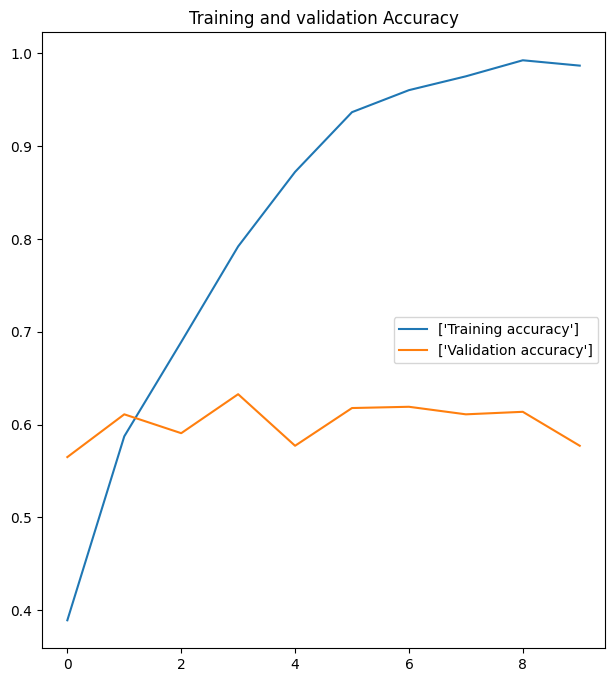

In [ ]:
#plotting train accuracy and validation accuracy
acc=history.history['accuracy']
val_acc=history.history['val_accuracy']
epochs_range=range(10)
plt.figure(figsize=(16,8))
plt.subplot(1,2,1)
plt.plot(epochs_range,acc,label=['Training accuracy'])
plt.plot(epochs_range,val_acc,label=['Validation accuracy'])
plt.legend(loc='right')
plt.title("Training and validation Accuracy")


# using Resnet

In [ ]:
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from tensorflow.keras.models import Model
from tensorflow.keras.preprocessing import image

In [ ]:
resnet_model=Sequential()
pretrained_model=ResNet50(include_top=False,
                          weights='imagenet',
                          input_shape=(256,256,3),
                          pooling='max'
                          )

94765736/94765736 [==============================] - 5s 0us/step


In [ ]:

pretrained_model.trainable=False
resnet_model.add(pretrained_model)
resnet_model.add(Flatten())
resnet_model.add(Dense(512,activation='relu'))
resnet_model.add(Dense(5,activation='softmax'))

In [ ]:
resnet_model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resnet50 (Functional)       (None, 2048)              23587712  
                                                                 
 flatten_1 (Flatten)         (None, 2048)              0         
                                                                 
 dense_2 (Dense)             (None, 512)               1049088   
                                                                 
 dense_3 (Dense)             (None, 5)                 2565      
                                                                 
Total params: 24,639,365
Trainable params: 1,051,653
Non-trainable params: 23,587,712
_________________________________________________________________


In [ ]:
# Normalize
#import tensorflow
#def process(image,label):
#    image = tensorflow.cast(image/255. ,tensorflow.float32)
#    return image,label

#train_ds = train_ds.map(process)
#valid_ds = valid_ds.map(process)

In [ ]:
resnet_model.compile(optimizer=Adam(learning_rate=0.001),loss='categorical_crossentropy',metrics=['accuracy'])

In [ ]:
history =resnet_model.fit(train_ds,epochs=9,validation_data=valid_ds)

Epoch 1/9
93/93 [==============================] - 22s 178ms/step - loss: 4.1930 - accuracy: 0.7090 - val_loss: 0.4648 - val_accuracy: 0.8401
Epoch 2/9
93/93 [==============================] - 17s 180ms/step - loss: 0.3600 - accuracy: 0.8801 - val_loss: 0.4091 - val_accuracy: 0.8577
Epoch 3/9
93/93 [==============================] - 16s 162ms/step - loss: 0.2400 - accuracy: 0.9126 - val_loss: 0.4268 - val_accuracy: 0.8631
Epoch 4/9
93/93 [==============================] - 15s 159ms/step - loss: 0.1625 - accuracy: 0.9377 - val_loss: 0.4482 - val_accuracy: 0.8645
Epoch 5/9
93/93 [==============================] - 15s 160ms/step - loss: 0.0934 - accuracy: 0.9699 - val_loss: 0.3961 - val_accuracy: 0.8753
Epoch 6/9
93/93 [==============================] - 15s 161ms/step - loss: 0.0569 - accuracy: 0.9814 - val_loss: 0.3910 - val_accuracy: 0.8902
Epoch 7/9
93/93 [==============================] - 17s 182ms/step - loss: 0.0285 - accuracy: 0.9929 - val_loss: 0.3715 - val_accuracy: 0.8916
Epoch 

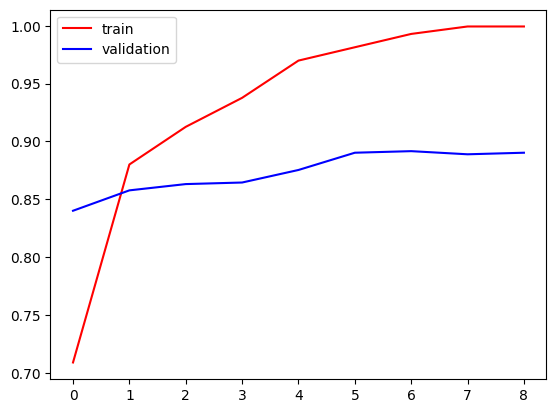

In [ ]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'],color='red',label='train')
plt.plot(history.history['val_accuracy'],color='blue',label='validation')
plt.legend()
plt.show()

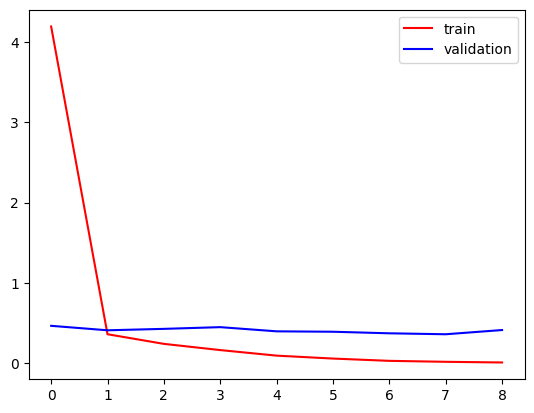

In [ ]:
plt.plot(history.history['loss'],color='red',label='train')
plt.plot(history.history['val_loss'],color='blue',label='validation')
plt.legend()
plt.show()

#Visualizing using Opencv2

In [ ]:
import cv2

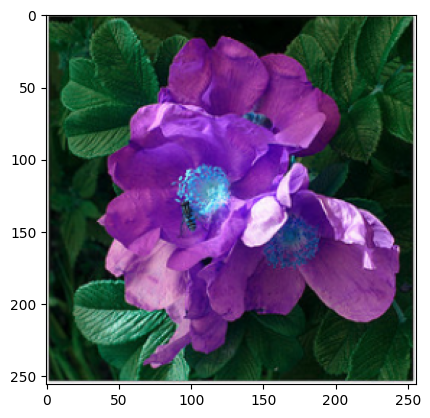

In [ ]:
path_to_directory = '/content/data/roses'

# List the files in the directory
file_list = os.listdir(path_to_directory)
image = file_list[0]
im=cv2.imread('/content/data/roses/'+image)
im_resize=cv2.resize(im,(256,256))
plt.imshow(im_resize)

In [ ]:
im_resize.shape

(256, 256, 3)

In [ ]:
image_1=np.expand_dims(im_resize,axis=0)
image_1.shape

(1, 256, 256, 3)

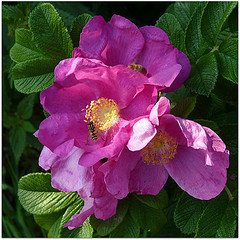

In [ ]:
import PIL
PIL.Image.open('/content/data/roses/'+image)

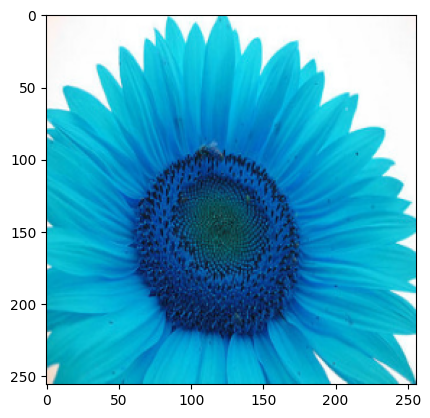

In [ ]:
path_to_directory = '/content/data/sunflowers'

# List the files in the directory
file_list = os.listdir(path_to_directory)
image = file_list[0]
im=cv2.imread('/content/data/sunflowers/'+image)
im_resize=cv2.resize(im,(256,256))
plt.imshow(im_resize)

In [ ]:
image_2=np.expand_dims(im_resize,axis=0)
image_2.shape

(1, 256, 256, 3)

# Predicting the result

In [ ]:
pred_1=resnet_model.predict(image_1)
pred_2=resnet_model.predict(image_2)

1/1 [==============================] - 0s 37ms/step


In [ ]:
classes[np.argmax(pred_1)]

'roses'

In [ ]:
classes[np.argmax(pred_2)]

'sunflowers'

In [ ]:
!pip install gradio

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 19.9/19.9 MB 77.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 65.7/65.7 kB 8.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 294.2/294.2 kB 34.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.4/75.4 kB 10.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 268.8/268.8 kB 32.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.5/50.5 kB 7.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 140.3/140.3 kB 19.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 45.7/45.7 kB 6.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 59.5/59.5 kB 7.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.9/129.9 kB 17.0 MB/s eta 0:00:00
INFO: pip is looking at multiple versions of mdit-py-plugins to determine which version is compatible with other requirements. This could take a while.
 

In [ ]:
import gradio as gr
image=gr.inputs.Image(shape=(256,256))
label=gr.outputs.Label(num_top_classes=5)

<ipython-input-48-05c497376e3b>:2: GradioDeprecationWarning: Usage of gradio.inputs is deprecated, and will not be supported in the future, please import your component from gradio.components
  image=gr.inputs.Image(shape=(256,256))
<ipython-input-48-05c497376e3b>:2: GradioDeprecationWarning: `optional` parameter is deprecated, and it has no effect
  image=gr.inputs.Image(shape=(256,256))
<ipython-input-48-05c497376e3b>:3: GradioDeprecationWarning: Usage of gradio.outputs is deprecated, and will not be supported in the future, please import your components from gradio.components
  label=gr.outputs.Label(num_top_classes=5)
<ipython-input-48-05c497376e3b>:3: GradioUnusedKwargWarning: You have unused kwarg parameters in Label, please remove them: {'type': 'auto'}
  label=gr.outputs.Label(num_top_classes=5)


In [ ]:
def predict_image(img):
  img=img.reshape(-1,256,256,3)
  predict=resnet_model.predict(img)[0]
  return {classes[i]: float(predict[i]) for i in range(5)}

In [ ]:
gr.Interface(fn=predict_image,inputs=image,outputs=label,interpretation='default').launch(debug='False')

Colab notebook detected. This cell will run indefinitely so that you can see errors and logs. To turn off, set debug=False in launch().
Note: opening Chrome Inspector may crash demo inside Colab notebooks.

To create a public link, set `share=True` in `launch()`.


<IPython.core.display.Javascript object>

1/1 [==============================] - 0s 31ms/step
